# Simple Linear Regression 

<Font color='orange'><h4>1.Problem Statement:</h4></Font>

To Predict the percentage of an student based on the no. of study hours.

In [201]:
#import python modules
import pandas as pd
import numpy as np

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [202]:
#Loading dataset to pandas dataframe
dataset = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [203]:
#understanding size,shape of dataset
dataset.shape

(25, 2)

In [204]:
#Understanding the data
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [205]:
#Exploring the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [206]:
#stats of dataset
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualize the given Data

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns

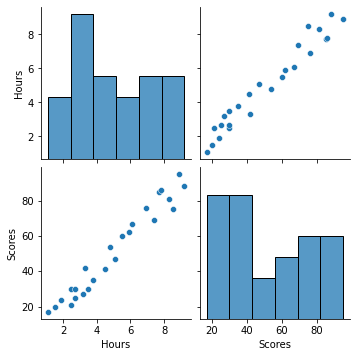

In [208]:
sns.pairplot(dataset)
plt.show()

#Observation:
There is a clear evidence that whilst studying hours increases the scores too increases

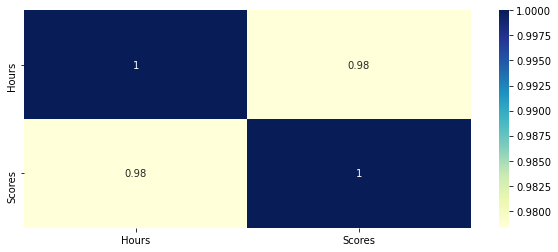

In [209]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (10, 4))
sns.heatmap(dataset_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

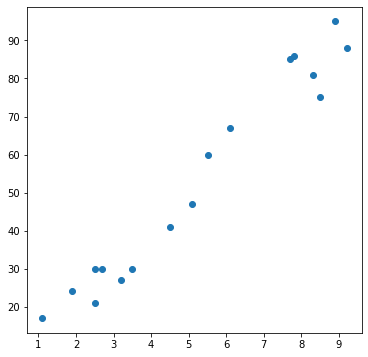

In [210]:
plt.figure(figsize=[6,6])
plt.scatter(dataset_train.Hours, dataset_train.Scores)
plt.show()

In [211]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [212]:
#Spliting X,Y datasets
X = dataset.iloc[:,:-1].values  #independent variable array - Hours
y = dataset.iloc[:,1].values  #dependent variable vector - Score

In [213]:
#Splitting datasets to train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3,random_state=0)

In [214]:
# Create Linear Regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [215]:
#Predicting on test data
y_pred = regressor.predict(X_test) 
y_pred

array([17.04289179, 33.51695377, 74.21757747, 26.73351648, 59.68164043,
       39.33132858, 20.91914167, 78.09382734, 69.37226512])

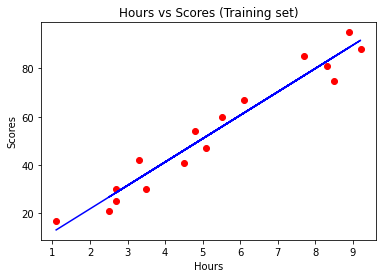

In [216]:
#plot for the TRAIN DATA
 
plt.scatter(X_train, y_train, color='red') # plotting the observation line
 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Hours vs Scores (Training set)") # stating the title of the graph
 
plt.xlabel("Hours") # adding the name of x-axis
plt.ylabel("Scores") # adding the name of y-axis
plt.show() # specifies end of graph

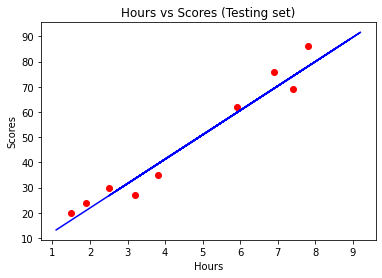

In [217]:
#plot for the TEST Datasets
 
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regressor.predict(X_train), color='blue') # plotting the regression line
 
plt.title("Hours vs Scores (Testing set)")
 
plt.xlabel("Hours") 
plt.ylabel("Scores") 
plt.show() 

### Loading model to compare the results

In [218]:
# Loading model to compare the results
import pickle
pickle.dump(regressor, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))

In [226]:
#testing the model with an example value
TestValue = '9.25'
filename = 'model.pkl'
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.predict(np.array(TestValue).reshape(-1, 1))
print("No of Hours studied: ", TestValue )
print("Percentage Obtained:", round(*result, 2))

No of Hours studied:  9.25
Percentage Obtained: 92.15


### Evaluating the model

In [220]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.691397441397446
